In [1]:
import pandas as pd
import geopandas as gpd

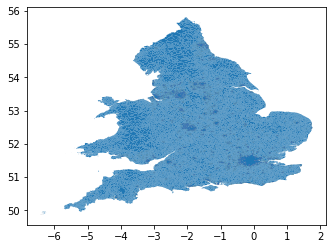

In [2]:
shape_url = 'https://opendata.arcgis.com/datasets/ff8151d927974f349de240e7c8f6c140_0.zip'
shape_data = gpd.read_file(shape_url)
shape_data.plot()

In [3]:
oac = pd.read_csv('../data/csv/2011oac.csv.gz')
oac.rename(columns={'Output Area Code':'OA11CD'},inplace=True)
merged_shapes = shape_data.merge(oac[['OA11CD','Local Authority Name', 'Subgroup Code']],on='OA11CD')
merged_shapes.drop(columns=['FID','LAD11CD','Shape__Are','Shape__Len'],inplace=True)

In [4]:
lcr = ['Liverpool','Halton','St. Helens','Sefton','Wirral','Knowsley']
la_df = {}
la_dfs = []
for local_authority in lcr:
    la_df[local_authority] = merged_shapes.loc[merged_shapes['Local Authority Name'] == local_authority]
    la_dfs.append(la_df[local_authority])
liverpoolcityregion = pd.concat(la_dfs)
liverpoolcityregion.to_file('../data/LiverpoolCityRegion.geojson',driver='GeoJSON')